Assignment 5

Multiple Linear Regression Assignment

Toyota Corolla Data

Prepare a prediction model for predicting Price.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
sns.set_palette('deep')

In [2]:
data = pd.read_csv("C:/Users/Dell/Downloads/ToyotaCorolla.csv", encoding='iso-8859-1', index_col='Id')
data.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


Consider the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]



In [3]:
data = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [4]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1438,7500,69,20544,86,1300,3,5,69,1025
1439,10845,72,19000,86,1300,3,5,69,1015
1440,8500,71,17016,86,1300,3,5,69,1015


In [5]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170


In [6]:
pd.DataFrame({'Column':data.columns,
              'NA count':[data[column].isna().sum() for column in data.columns],
              'Dtype':[data[column].dtype for column in data.columns],
              'Nunique':[data[column].nunique() for column in data.columns]})

,Column,NA count,Dtype,Nunique
0,Price,0,int64,236
1,Age_08_04,0,int64,77
2,KM,0,int64,1263
3,HP,0,int64,12
4,cc,0,int64,13
5,Doors,0,int64,4
6,Gears,0,int64,4
7,Quarterly_Tax,0,int64,13
8,Weight,0,int64,59


In [7]:
num_columns = ['Price','Age_08_04','KM','HP','cc','Quarterly_Tax','Weight']
cat_columns = ['Doors','Gears']

In [8]:
num_columns

['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Quarterly_Tax', 'Weight']

In [9]:
cat_columns

['Doors', 'Gears']

Data Visualization

Univariate Analysis

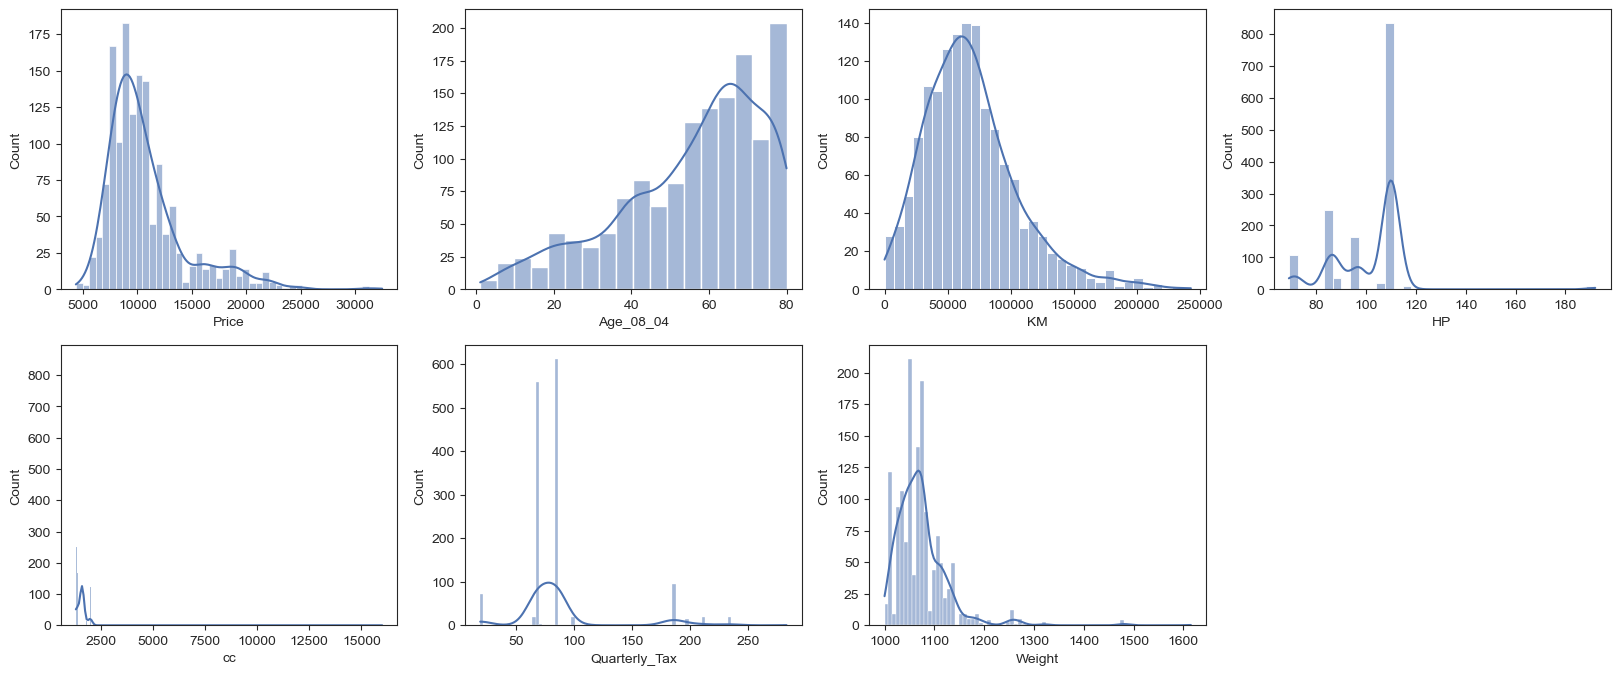

In [10]:
plt.figure(figsize=(20,8))
for i in range(len(num_columns)):
    plt.subplot(2,4,i+1)
    sns.histplot(data=data, x=num_columns[i], kde=True)

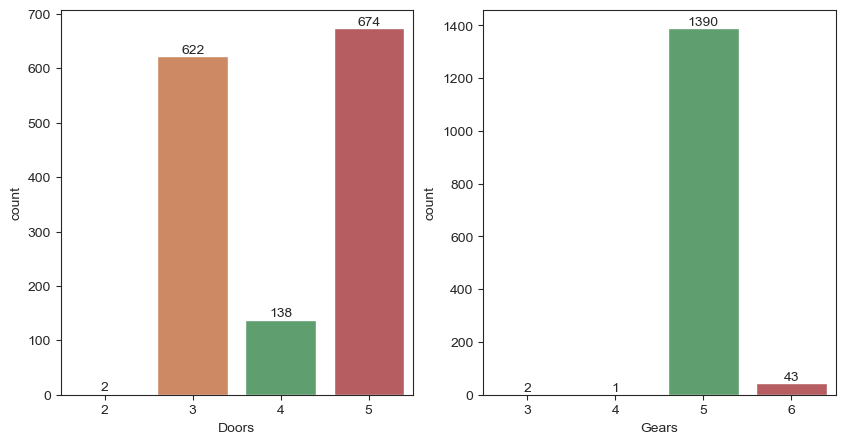

In [11]:
figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
for i in range(len(cat_columns)):
    sns.countplot(data=data, x=cat_columns[i], ax=axes[i])
    axes[i].bar_label(axes[i].containers[0]);

<AxesSubplot:xlabel='cc'>

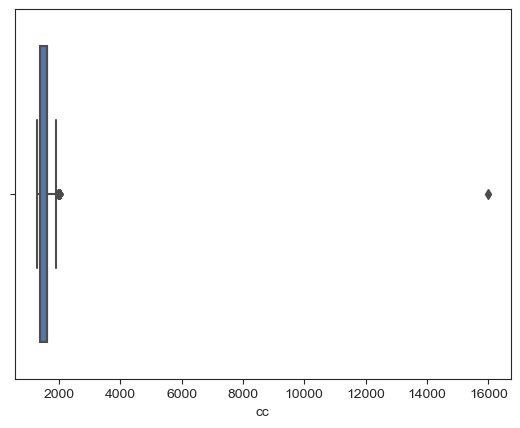

In [12]:
sns.boxplot(data=data, x='cc')

Removing the outlier in cc variable

In [16]:
data.drop(data[data['cc']>14000].index, axis=0, inplace=True)

<Figure size 2000x800 with 0 Axes>

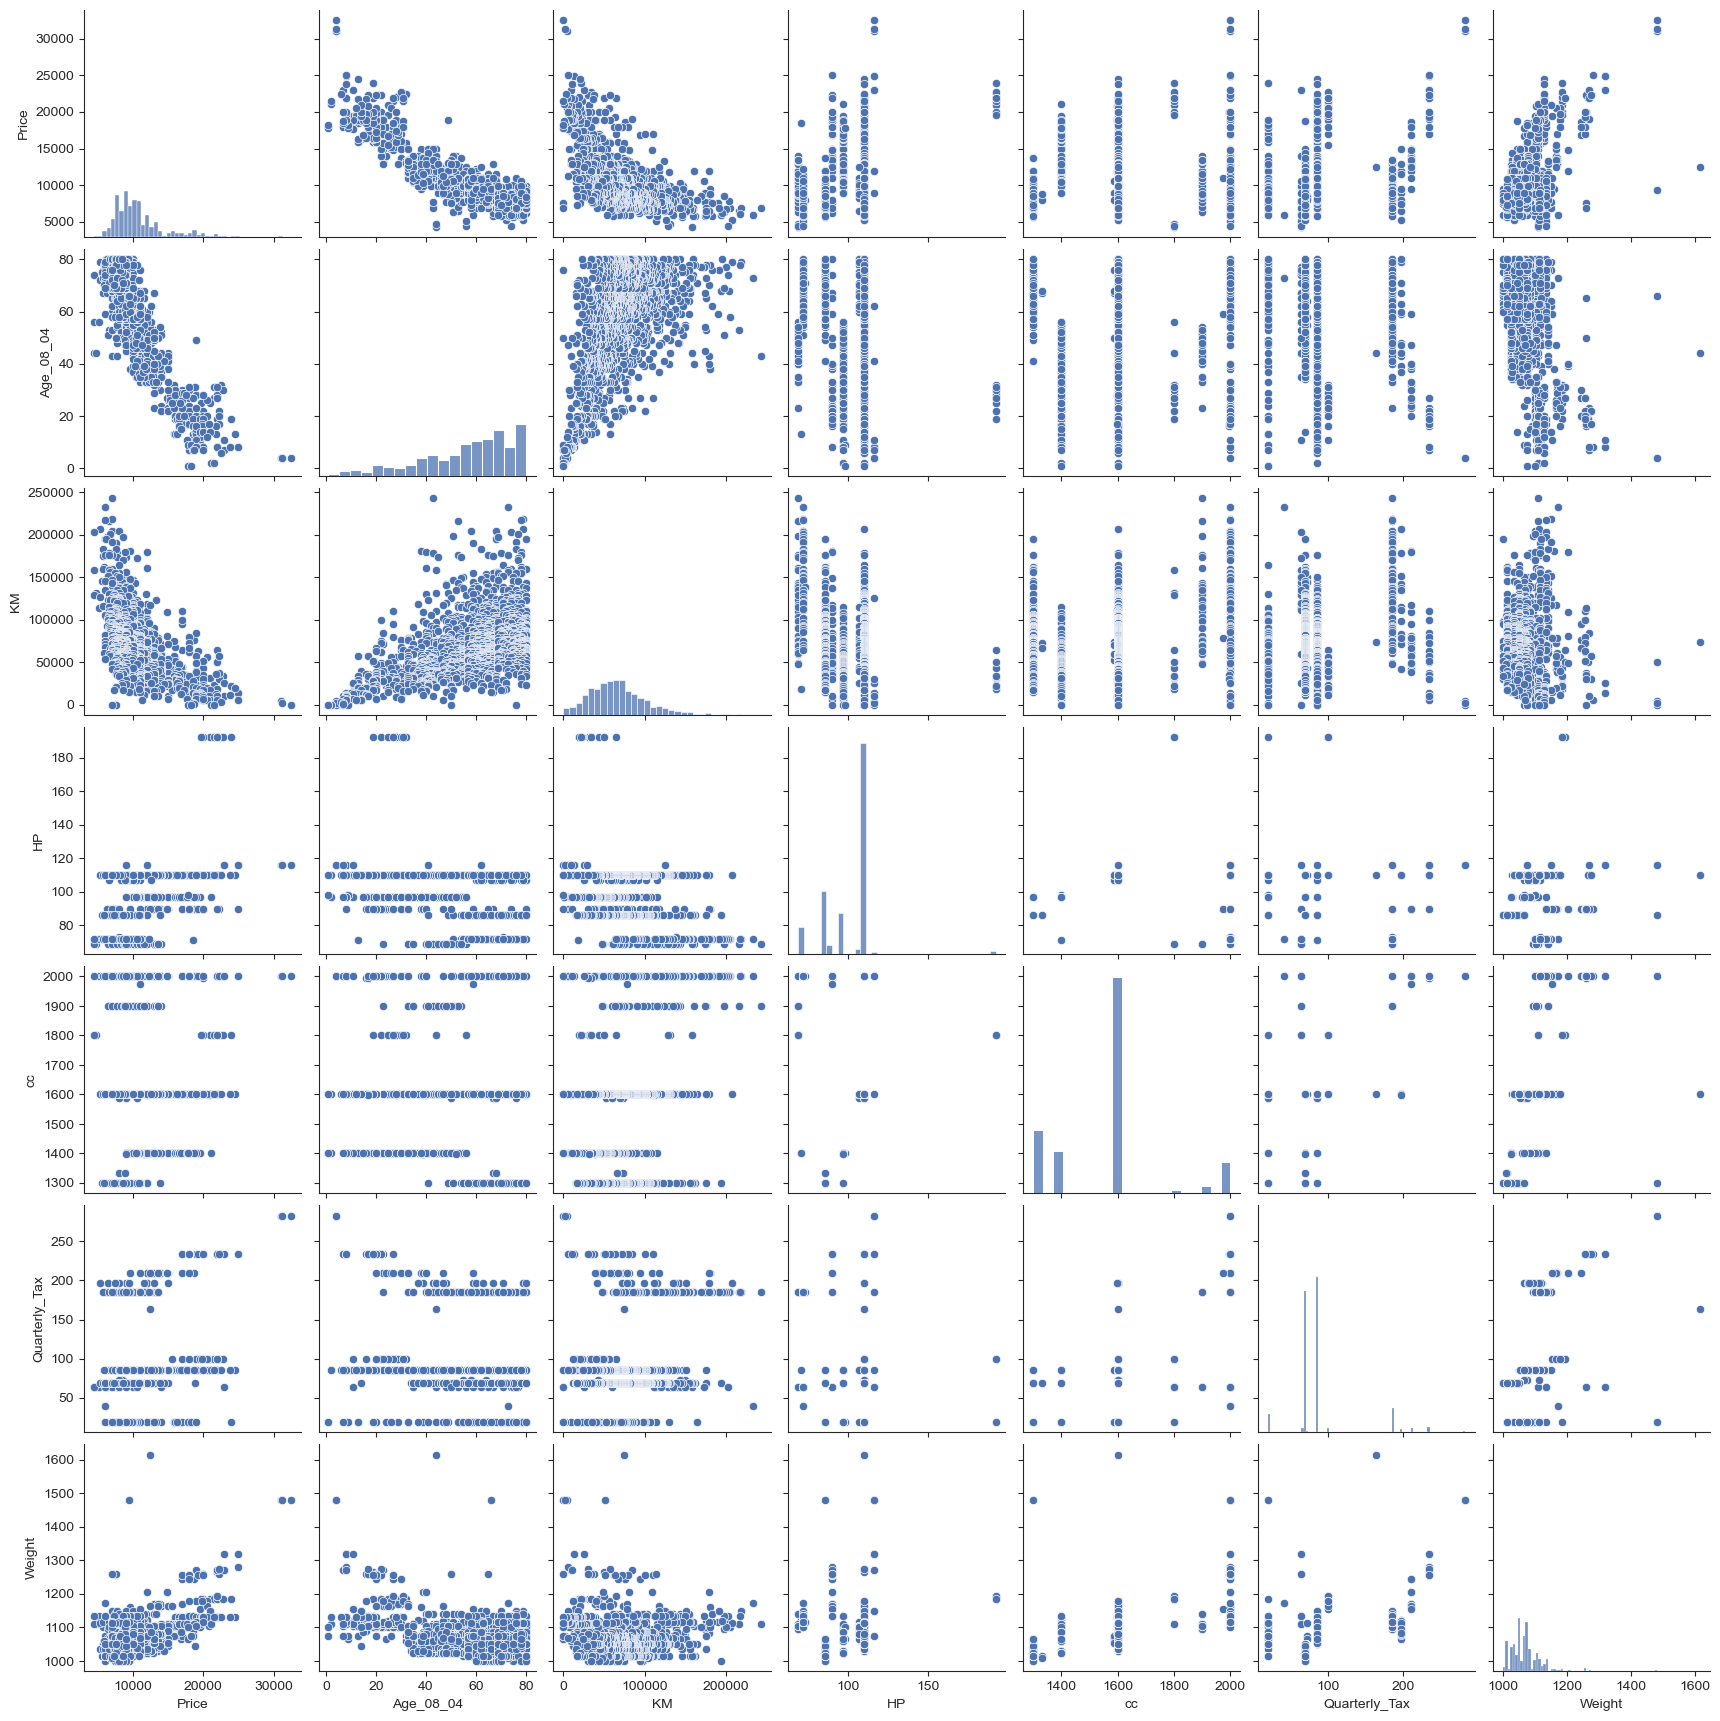

In [17]:
plt.figure(figsize=(20,8))
sns.pairplot(data=data[num_columns])

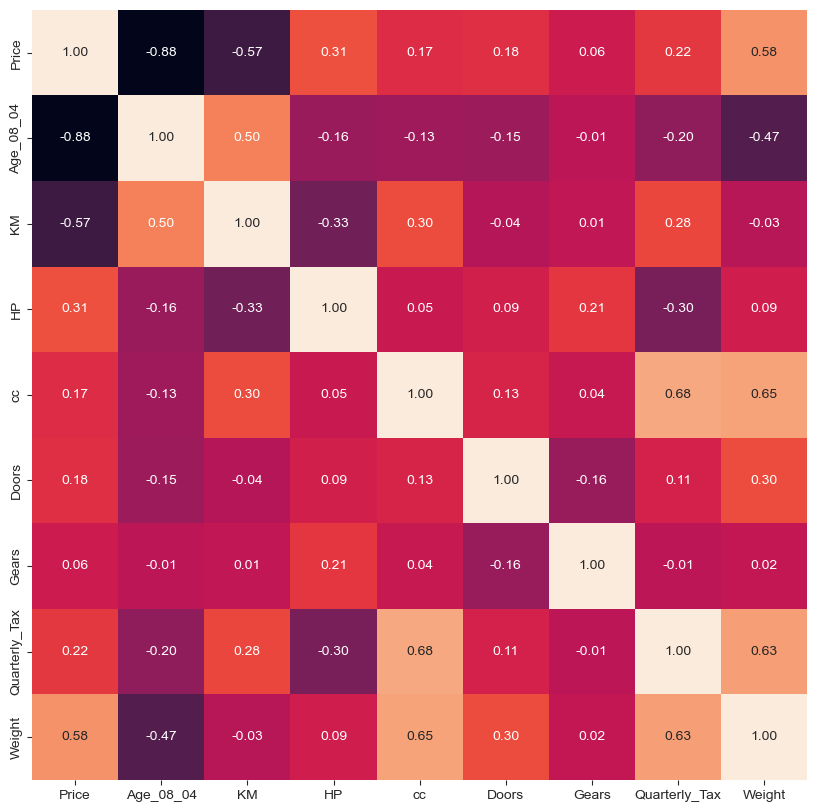

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(),cbar=False,annot=True,fmt='.2f');

Building Raw Models

In [19]:
data = data.rename(columns={'Price':'PRICE','Age_08_04':'AGE','cc':'CC','Doors':'DS','Gears':'GS','Quarterly_Tax':'QT','Weight':'WT'})

In [20]:
data

,PRICE,AGE,KM,HP,CC,DS,GS,QT,WT
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1438,7500,69,20544,86,1300,3,5,69,1025
1439,10845,72,19000,86,1300,3,5,69,1015
1440,8500,71,17016,86,1300,3,5,69,1015


In [21]:
data.head()

,PRICE,AGE,KM,HP,CC,DS,GS,QT,WT
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170


In [22]:
vars = ['AGE','WT','KM','HP','QT','DS','CC','GS']
vif = []
rsq_all = []
for var in vars:
    rsq = smf.ols(var+'~'+'+'.join([str(e) for e in vars if e!=var]), data=data).fit().rsquared
    rsq_all.append(rsq)
    vif.append(1/(1-rsq))

vif_frame = pd.DataFrame({'variables':vars,'VIF':vif})
vif_frame.sort_values('VIF')

,variables,VIF
7,GS,1.100907
5,DS,1.163178
3,HP,1.583835
0,AGE,1.887229
2,KM,1.909570
6,CC,2.754405
4,QT,2.859861
1,WT,2.864117


In [23]:
from scipy.stats import pearsonr
dict([(column, np.round(np.abs(pearsonr(data[column],data['PRICE'])[0]),2)) for column in data.columns])

{'PRICE': 1.0,
 'AGE': 0.88,
 'KM': 0.57,
 'HP': 0.31,
 'CC': 0.17,
 'DS': 0.18,
 'GS': 0.06,
 'QT': 0.22,
 'WT': 0.58}

In [25]:
vars = ['AGE','WT','KM','HP','QT','DS','CC','GS']
start = "PRICE~AGE"
names = ['AGE']
model = smf.ols(start,data=data).fit()
rsquared = [model.rsquared]
adj_rsquared = [model.rsquared_adj]
aic = [model.aic]
for i in range(len(vars)-1):
    start += "+"+vars[i+1]
    names.append(names[-1]+"+"+vars[i+1])
    model = smf.ols(start,data=data).fit()
    rsquared.append(model.rsquared)
    adj_rsquared.append(model.rsquared_adj)
    aic.append(model.aic)

pd.DataFrame({'aic':aic,'rsquared':rsquared,'adj_rsquared':adj_rsquared},index=names)

,aic,rsquared,adj_rsquared
AGE,25497.376784,0.768036,0.767874
AGE+WT,25253.436251,0.804571,0.804298
AGE+WT+KM,24898.214388,0.847638,0.847318
AGE+WT+KM+HP,24764.783994,0.861360,0.860972
AGE+WT+KM+HP+QT,24757.270480,0.862276,0.861794
AGE+WT+KM+HP+QT+DS,24758.894064,0.862312,0.861733
AGE+WT+KM+HP+QT+DS+CC,24692.688478,0.868703,0.868059
AGE+WT+KM+HP+QT+DS+CC+GS,24687.281024,0.869379,0.868646


Q-Q plot with all variable included

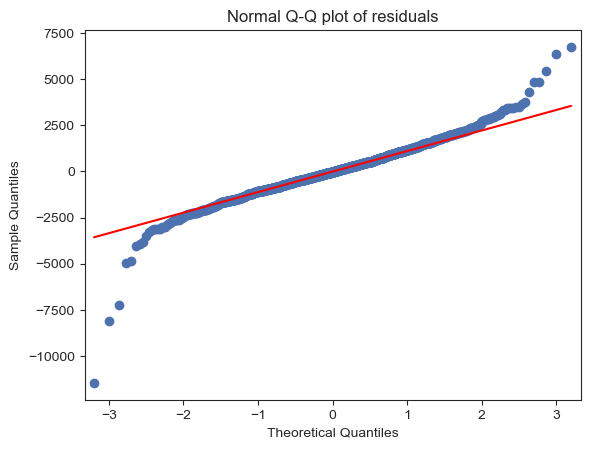

In [26]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q');
plt.title("Normal Q-Q plot of residuals");

Text(0, 0.5, 'Cooks Distance')

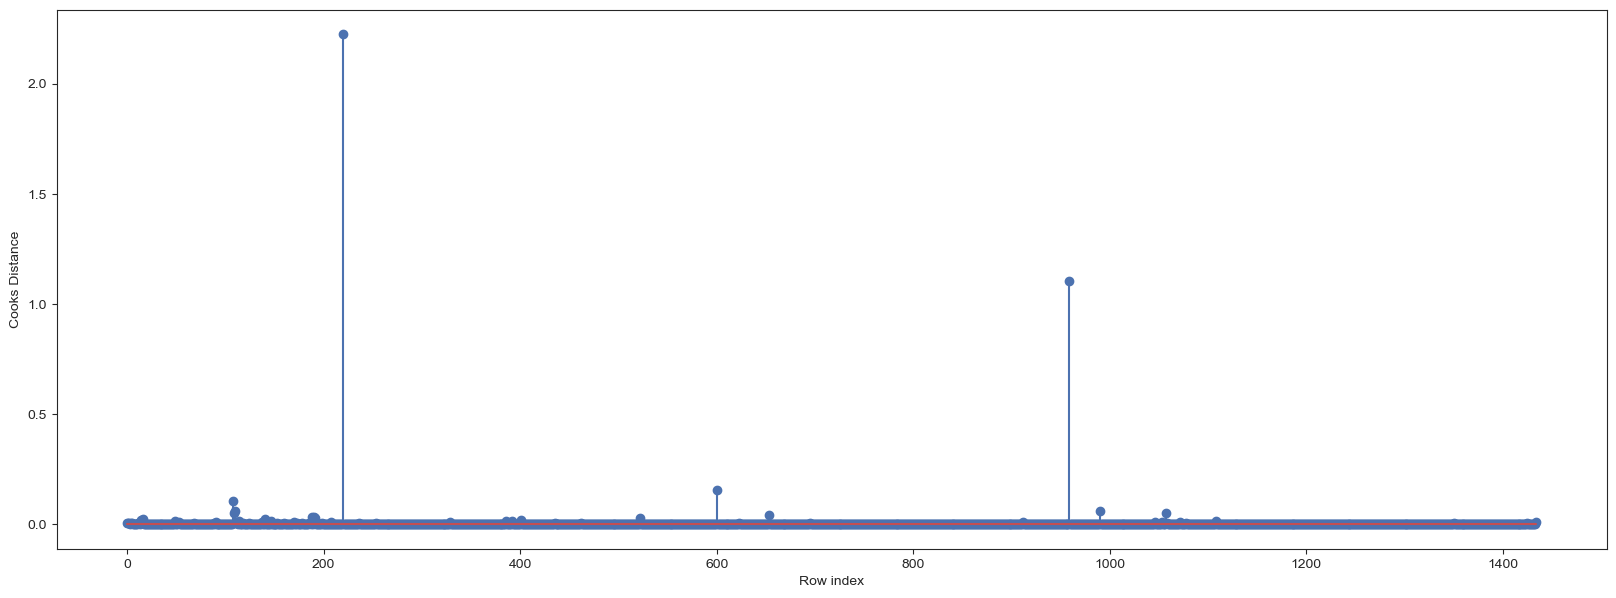

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [28]:
np.where(c>1.0)

(array([220, 959], dtype=int64),)

Removing outliers

In [29]:
data2 = data.drop(data.index[[220,959]],axis=0)

In [30]:
data2

,PRICE,AGE,KM,HP,CC,DS,GS,QT,WT
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1438,7500,69,20544,86,1300,3,5,69,1025
1439,10845,72,19000,86,1300,3,5,69,1015
1440,8500,71,17016,86,1300,3,5,69,1015


building second model

In [31]:
model2 = smf.ols('PRICE~AGE+WT+KM+HP+QT+DS+CC+GS',data=data2).fit()
print('rsquared: ',model2.rsquared)
print('adjusted rsquared: ', model2.rsquared_adj)
print('aic: ',model2.aic)

rsquared:  0.8851845904421739
adjusted rsquared:  0.8845395600513997
aic:  24469.715205158594


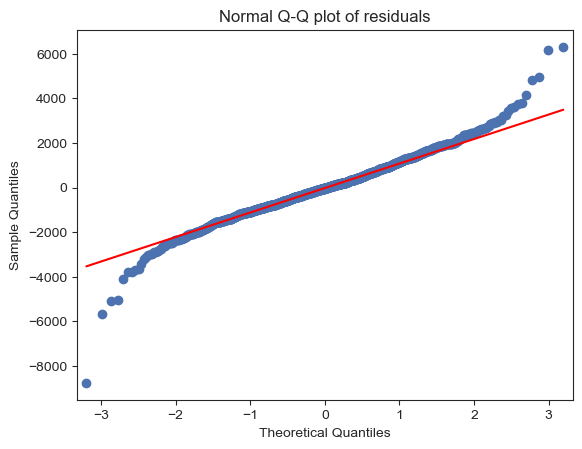

In [32]:
import statsmodels.api as sm
qqplot = sm.qqplot(model2.resid, line='q');
plt.title("Normal Q-Q plot of residuals");

In [33]:
np.where(model2.resid<-6000)

(array([599], dtype=int64),)

Text(0, 0.5, 'Cooks Distance')

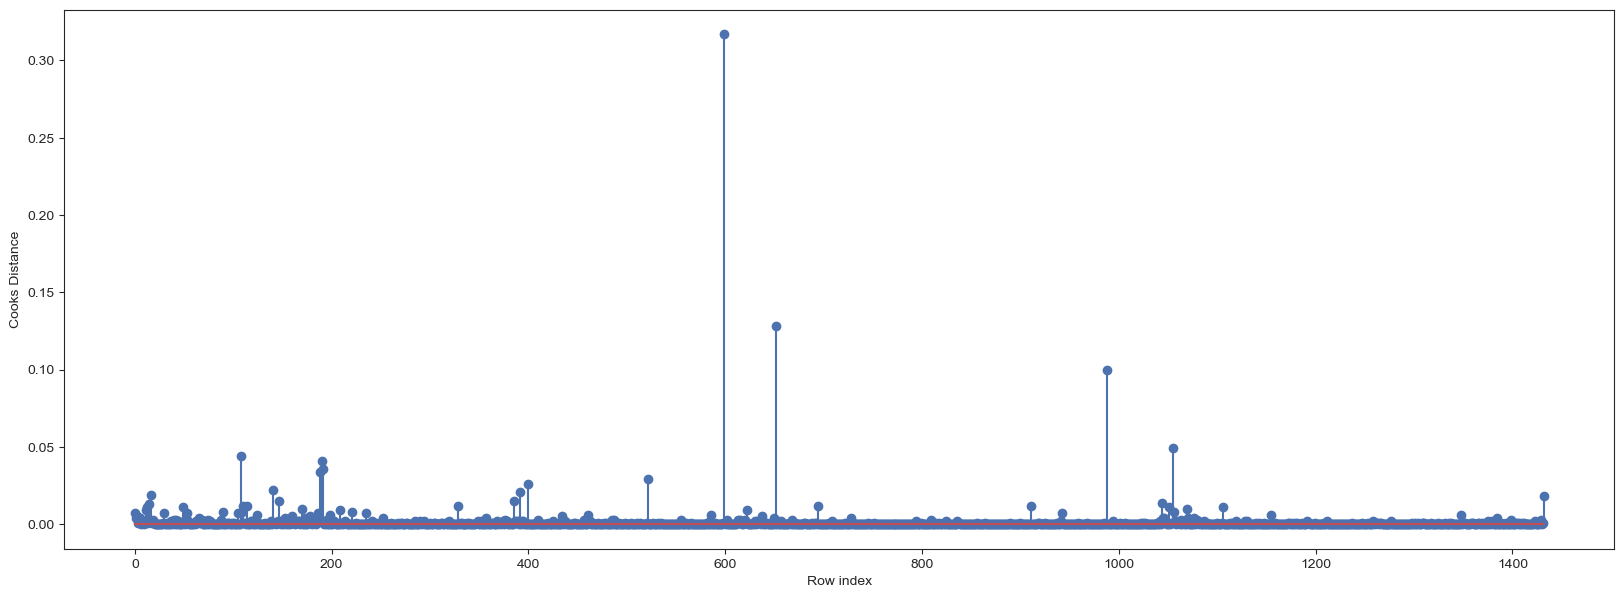

In [34]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data2)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [35]:
np.argmax(c), np.max(c)

(599, 0.3166131528145409)

Removing outliers

In [36]:
data3 = data2.drop(data2.index[599],axis=0)

In [37]:
data3

,PRICE,AGE,KM,HP,CC,DS,GS,QT,WT
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1438,7500,69,20544,86,1300,3,5,69,1025
1439,10845,72,19000,86,1300,3,5,69,1015
1440,8500,71,17016,86,1300,3,5,69,1015


Build 3rd model

In [39]:
model3 = smf.ols('PRICE~AGE+WT+KM+HP+QT+DS+CC+GS',data=data3).fit()
print('rsquared: ',model3.rsquared)
print('adjusted rsquared: ', model3.rsquared_adj)
print('aic: ',model3.aic)

rsquared:  0.8894191849749751
adjusted rsquared:  0.888797507870126
aic:  24399.04559187014


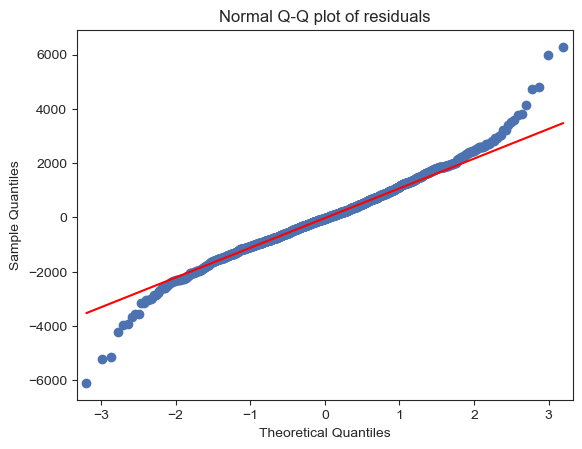

In [40]:
import statsmodels.api as sm
qqplot = sm.qqplot(model3.resid, line='q');
plt.title("Normal Q-Q plot of residuals");

Text(0, 0.5, 'Cooks Distance')

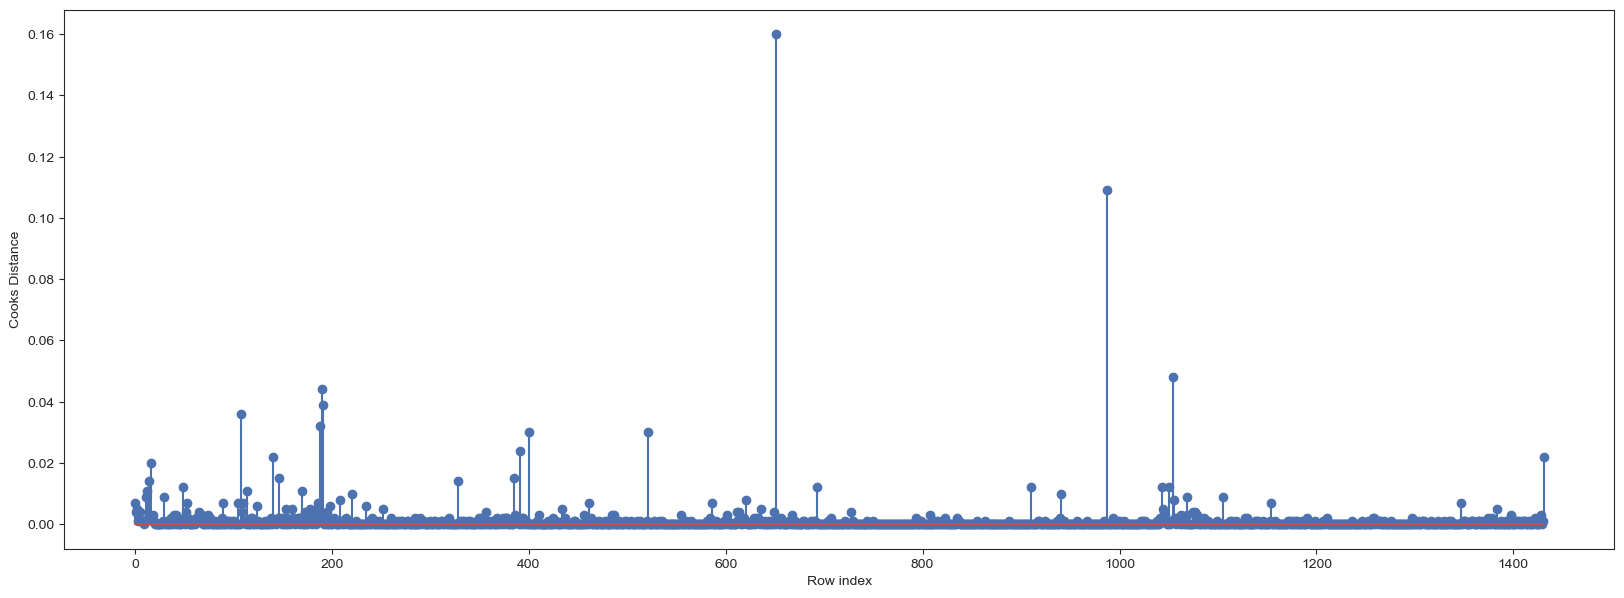

In [41]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model3.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data3)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

Residual model

Text(0, 0.5, 'Standardized residual values')

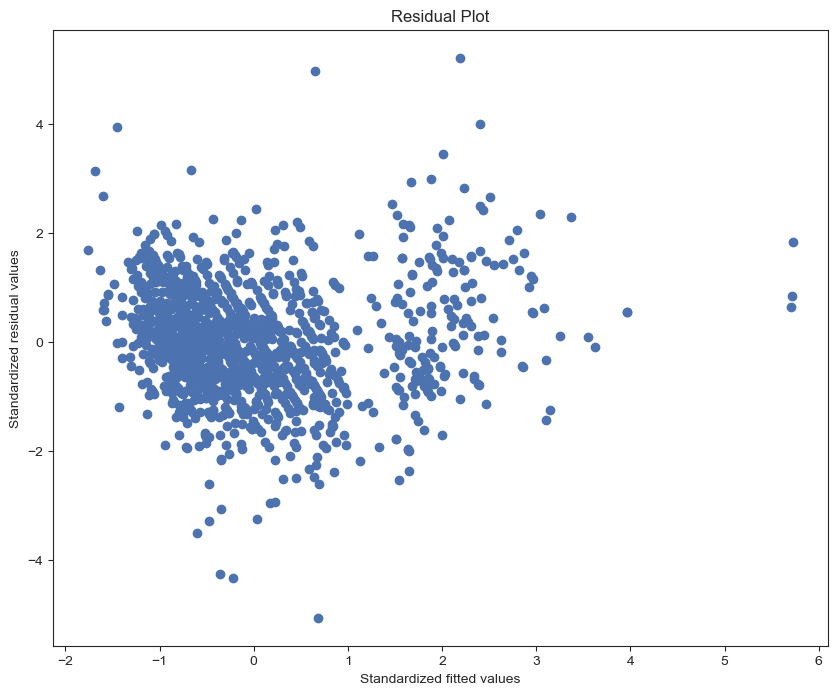

In [42]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

plt.figure(figsize=(10,8))
plt.scatter(get_standardized_values(model3.fittedvalues), get_standardized_values(model3.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')

Residual virsus regressor

eval_env: 1


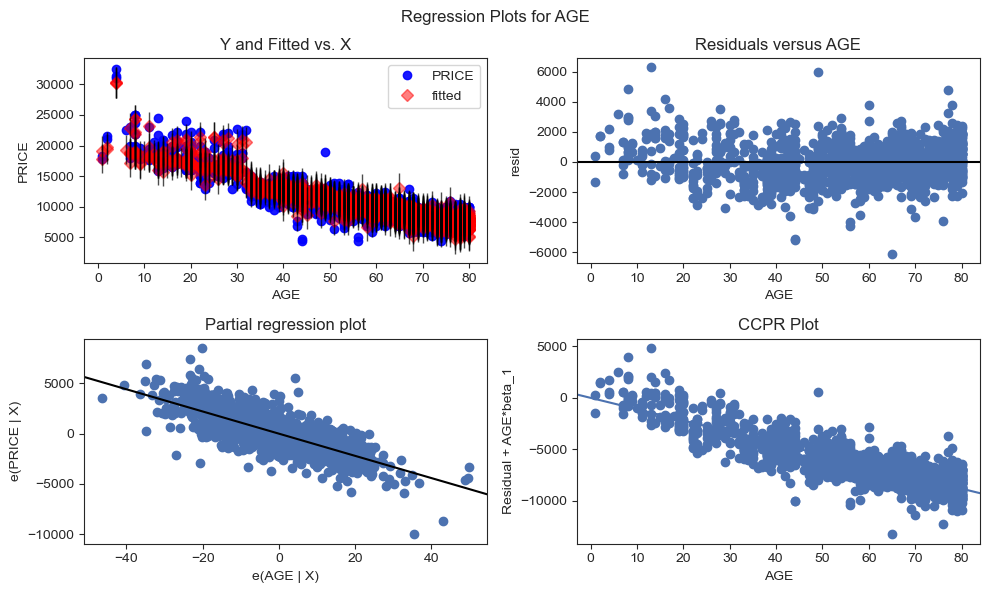

In [44]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'AGE',fig=fig)

eval_env: 1


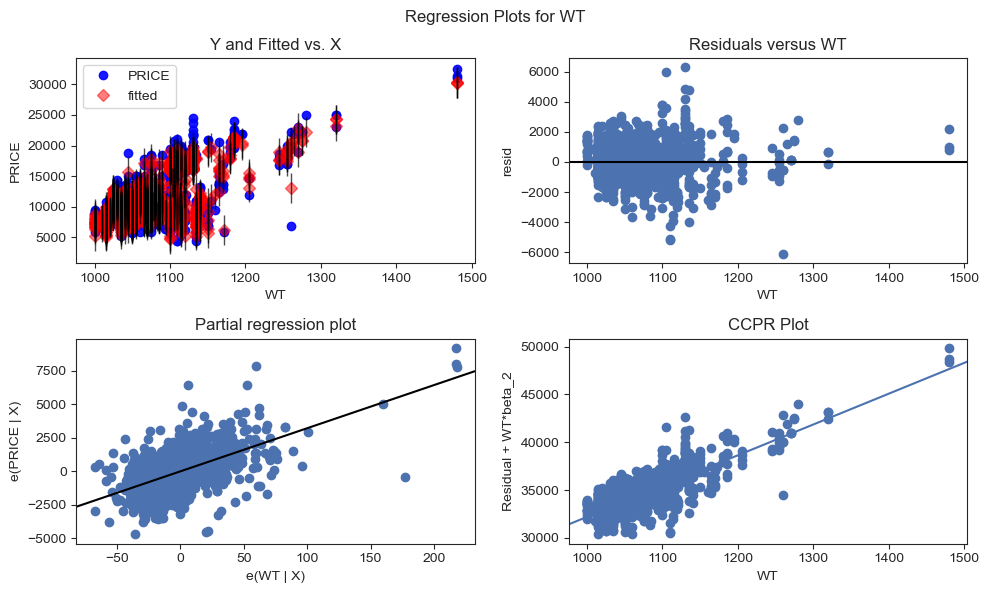

In [45]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'WT',fig=fig)

eval_env: 1


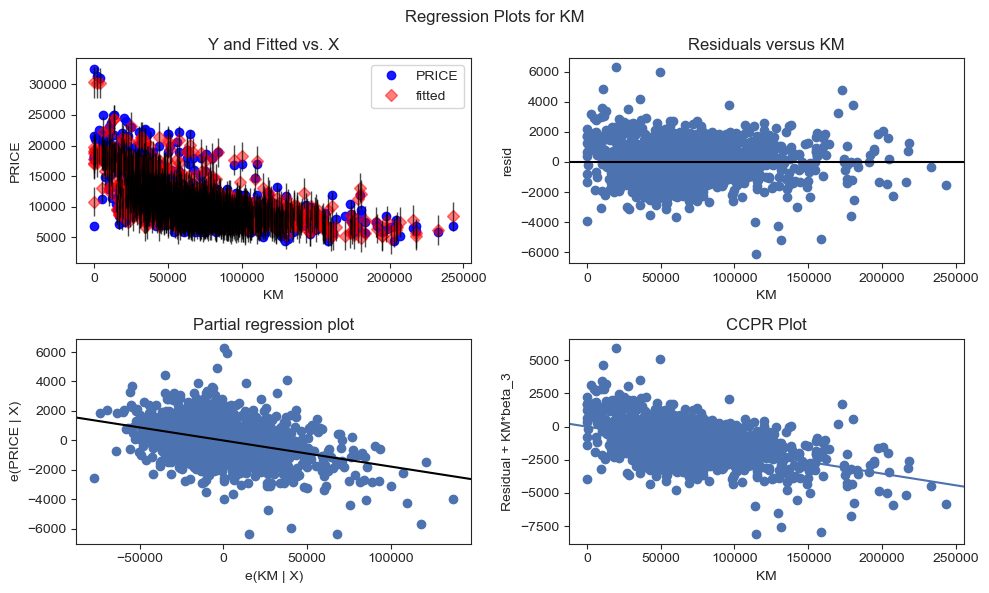

In [46]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'KM',fig=fig)

eval_env: 1


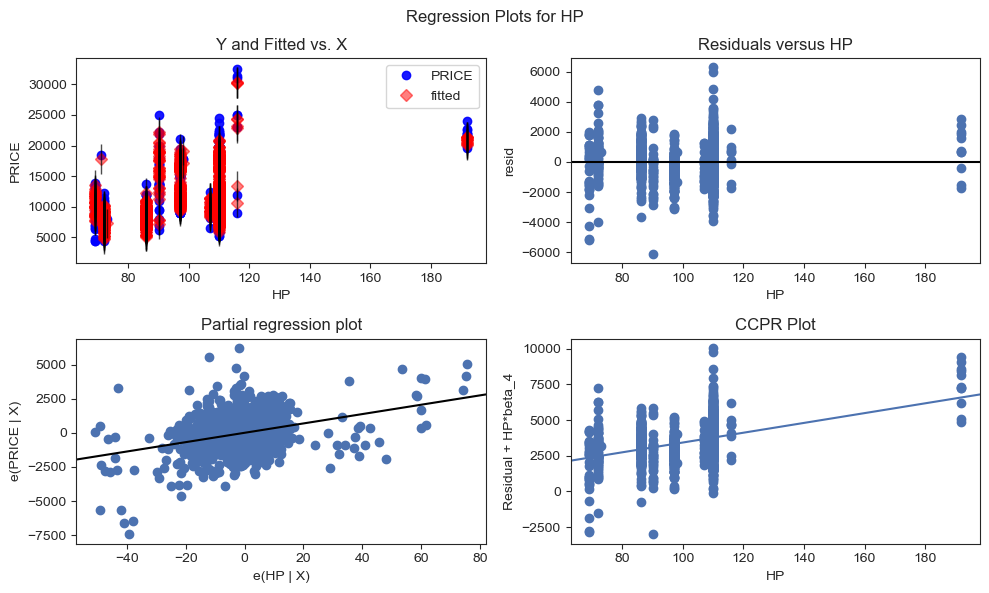

In [47]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'HP',fig=fig)

eval_env: 1


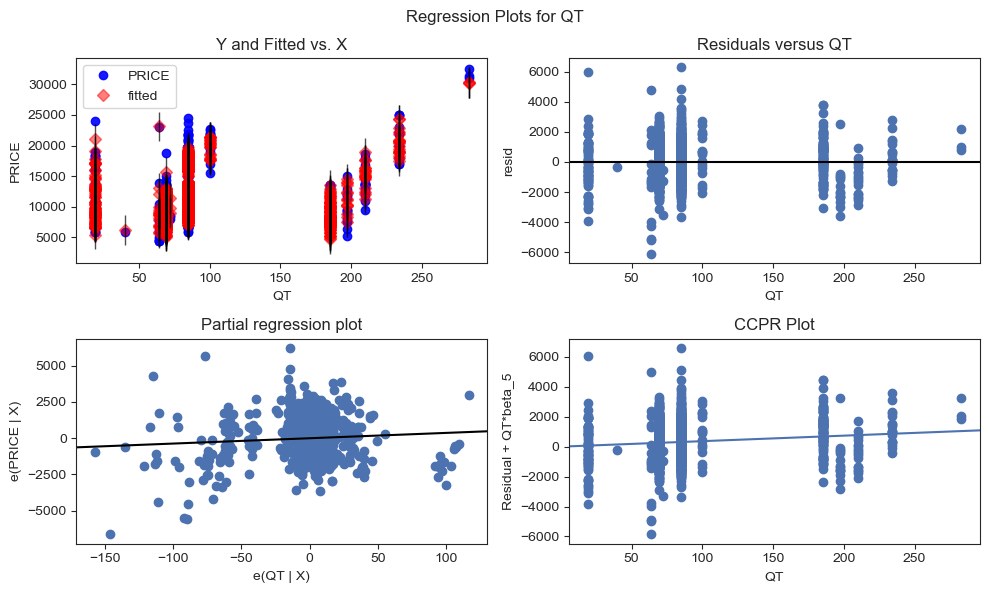

In [48]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'QT',fig=fig)

eval_env: 1


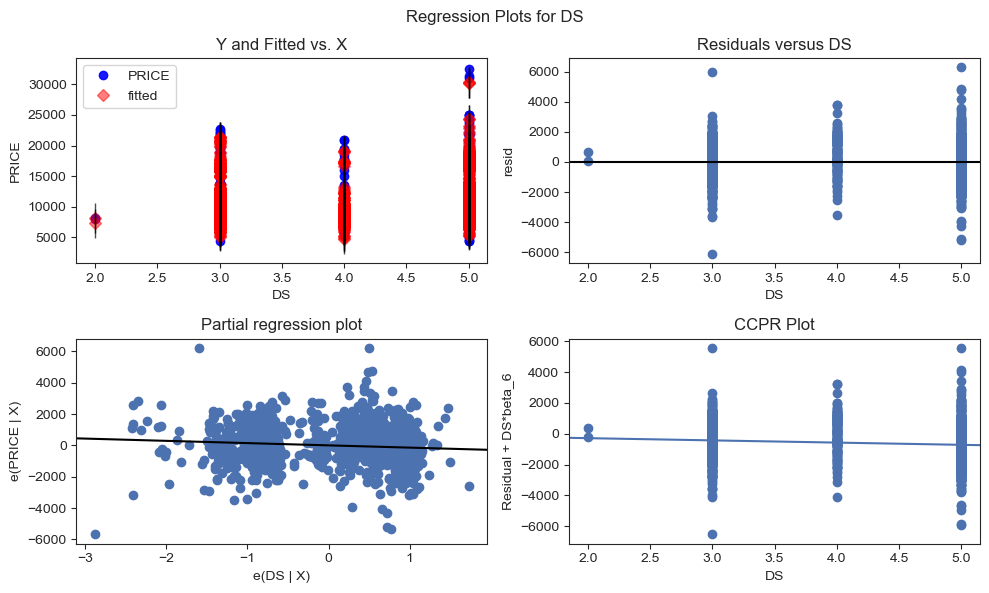

In [51]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'DS',fig=fig)

eval_env: 1


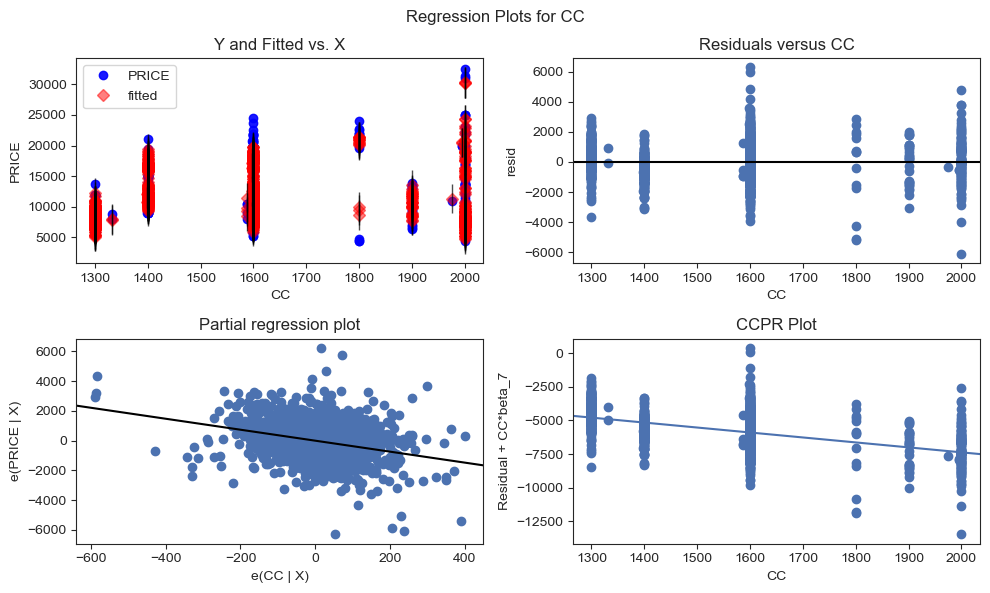

In [52]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'CC',fig=fig)

eval_env: 1


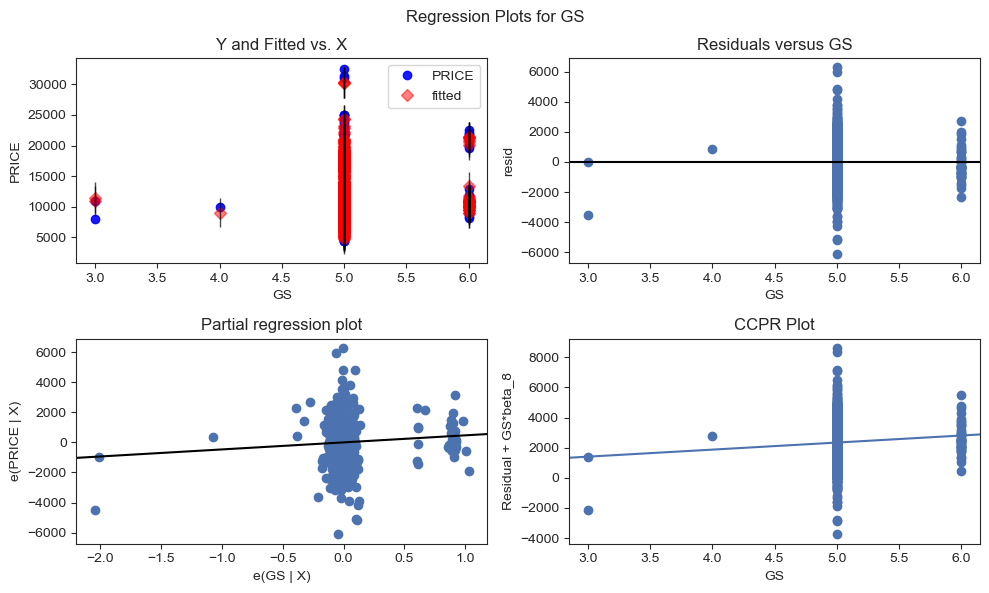

In [53]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'GS',fig=fig)